<a href="https://colab.research.google.com/github/MHaley206265/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Matt_Haley_DSPT6_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# imports
import numpy as np
import pandas as pd
from textwrap import dedent
import matplotlib.pyplot as plt


In [0]:
# Function to find mean, variance, and std

def mean_var_std(nums):
  mean = sum(nums) / len(nums)
  dist = list(map(lambda x: x - mean, nums))
  sq_dist = list(map(lambda x: x**2, dist))
  variance = sum(sq_dist) / (len(nums)-1)
  std = variance**(1/2)
  return print(dedent(f"""
  The mean of the list is: {mean}
  The variance of the list is : {variance}
  The standard deviation of the list is: {std}
  """))

In [21]:
# making list
past_week_sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

# passing list into function
mean_var_std(x_list)


The mean of the list is: 3052.714285714286
The variance of the list is : 214387.90476190473
The standard deviation of the list is: 463.0204150595357



## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [28]:
past_week_customer = [127, 80, 105, 92, 120, 115, 93]
sales_df = pd.DataFrame({
    'sales':past_week_sales,
    'customers':past_week_customer
})
sales_df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


In [0]:
# the covariance is 7604.36

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [31]:
sales_std = sales_df['sales'].std()
cust_std = sales_df['customers'].std()

sales_cov = sales_df['sales'].cov(sales_df['customers'])

sales_corr = sales_cov / (sales_std * cust_std)
print(f'The correlation coefficient between sales and customers is {sales_corr}')

The correlation coefficient between sales and customers is 0.9628339778148909


In [32]:
# checking work with pandas
sales_df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


In [0]:
# work checks out

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [33]:
# importing dataset...
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [35]:
titanic[['pclass', 'survived', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'boat', 'has_cabin_number']].cov()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,0.174613


In [34]:
titanic[['pclass', 'survived', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'boat', 'has_cabin_number']].corr()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

0


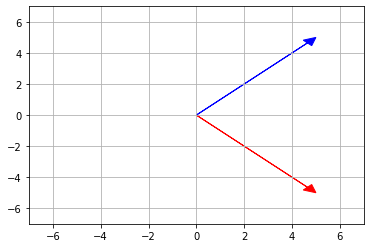

In [45]:
# Creating vectors
vec_a = [5,5]
vec_b = [5,-5]
print(np.dot(vec_a, vec_b))
# setting up plot
fig, ax = plt.subplots()
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.grid(True)
# plotting vectors
for vec, color in [(vec_a, 'blue'), (vec_b, 'red')]:
  plt.arrow(0, 0,
            vec[0],
            vec[1],
            head_width = .5,
            head_length = .5,
            length_includes_head = True,
            color = color)
  

In [0]:
# purpendicular is a synonym of orthogonal

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [44]:
# creating vectors a and b
a = np.array([-5,3,7])
b = np.array([6,-8,2])
np.dot(a,b)

-40

In [0]:
# the vectors are not orthogonal because their dot product does not equal 0

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [50]:
c = np.array([2,-15,6,20])
print(np.linalg.norm(c)**2)
print(np.dot(c,c))
print(c.T * c)

665.0
665
[  4 225  36 400]


In [0]:
# all of these represent the norm of a vector

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [51]:
# creating vector
f = [4,12,11,9,2]
f_hat = f/np.linalg.norm(f)
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

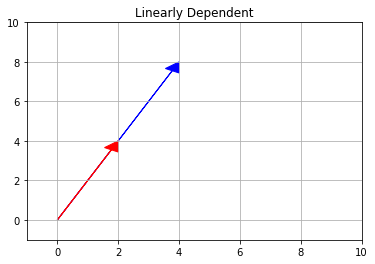

In [57]:
# creating dependent vectors
v1 = [2, 4]
v2 = np.multiply(v1, 2)

# setting up plot
fig, ax = plt.subplots()
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)
ax.grid(True)
# plotting vectors
for vec, color in [(v2, 'blue'), (v1, 'red')]:
  plt.arrow(0, 0,
            vec[0],
            vec[1],
            head_width = .5,
            head_length = .5,
            length_includes_head = True,
            color = color)
plt.title('Linearly Dependent');
  

Text(0.5, 1.0, 'Linearly Independent')

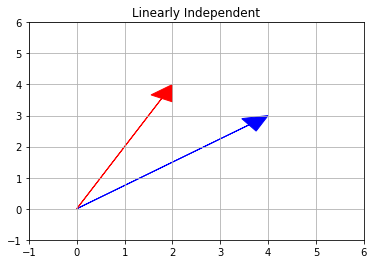

In [59]:
# creating independent vectors
v1 = [2, 4]
v2 = [4, 3]

# setting up plot
fig, ax = plt.subplots()
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)
ax.grid(True)
# plotting vectors
for vec, color in [(v2, 'blue'), (v1, 'red')]:
  plt.arrow(0, 0,
            vec[0],
            vec[1],
            head_width = .5,
            head_length = .5,
            length_includes_head = True,
            color = color)
plt.title('Linearly Independent')

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

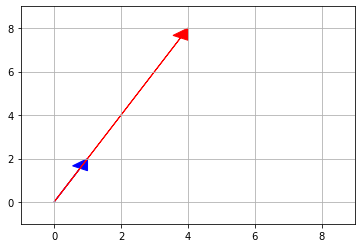

In [60]:
g = [1, 2]
h = [4, 8]
# setting up plot
fig, ax = plt.subplots()
ax.set_xlim(-1, 9)
ax.set_ylim(-1, 9)
ax.grid(True)
# plotting vectors
for vec, color in [(g, 'blue'), (h, 'red')]:
  plt.arrow(0, 0,
            vec[0],
            vec[1],
            head_width = .5,
            head_length = .5,
            length_includes_head = True,
            color = color)


In [0]:
# the vectors are colinear so their span is an infinite line

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# the vectors are not colinear, so their span is an infinite cube

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



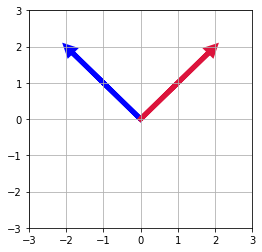

In [61]:
v1 = [-2, 2]
v2 = [2, 2]

# Plot the Scaled Vectors
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

for vect, color, width in [(v1, 'blue', 5), (v2, 'crimson', 5)]:
  plt.arrow(0, 0,
            vect[0],
            vect[1],
            head_width=.2,
            head_length=0.2,
            linewidth=width,
            color=color,
            length_includes_head=True)

## 6.2 What does it mean to form a basis?

It is when two vectors are orthonormal.  Meaning they are orthogonal with eachother and are normalized

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [63]:
P = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])
print(f'The rank of matrix P is: {np.linalg.matrix_rank(P)}')

The rank of matrix P is: 3


## 7.2 What does the rank of a matrix tell us?

Rank is the number of dimensions that the output of the matrix would use.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

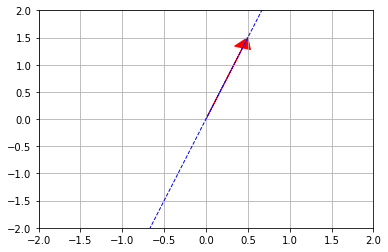

In [71]:
# Creating Vectors
v = np.array([1,3])
w = np.array([-1,2])
# Dot Products
w_dot_v = np.dot(w,v)
v_dot_v = np.dot(v,v)
frac = w_dot_v / v_dot_v
proj = np.multiply(frac, v)

# setting up plot
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.grid(True)
# plotting vectors
plt.arrow(0, 0,
          proj[0],
          proj[1],
          head_width = .2,
          head_length = .2,
          length_includes_head = True,
          color = 'red')
x_vals = np.array(ax.get_xlim())
y_vals = 3*x_vals
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1);

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

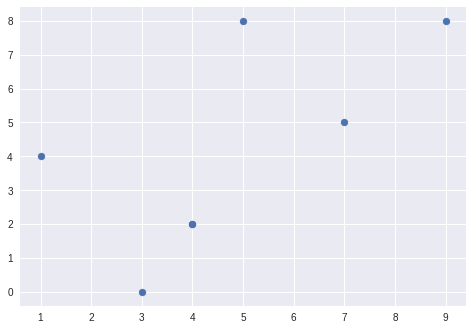

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()